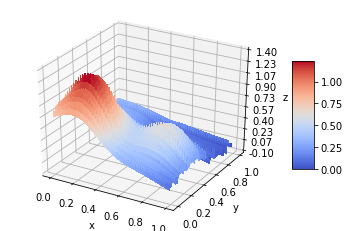

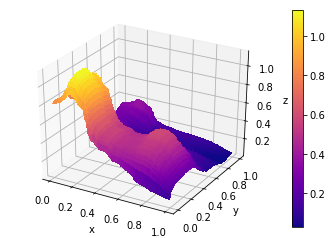

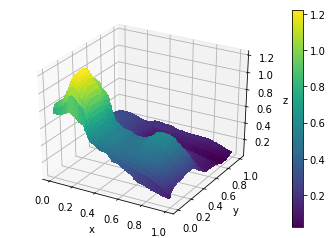

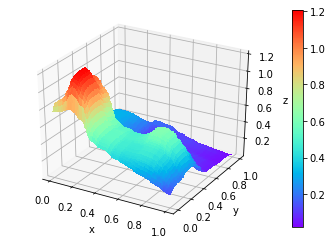

In [31]:
### This code is a bit weird, as you may remember. We don't know how/why but it seems to work (better and faster)

# Ordinary least squares:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Make data.

np.random.seed(13)
error = 0.05
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + error*np.random.randn(100,1)

xx, yy = np.meshgrid(x,y)
z = FrankeFunction(xx, yy)

poly3 = PolynomialFeatures(degree=3)
Xdes3 = poly3.fit_transform(x.reshape(-1,1), y.reshape(-1,1))

poly4 = PolynomialFeatures(degree=4)
Xdes4 = poly4.fit_transform(x.reshape(-1,1), y.reshape(-1,1))

poly5 = PolynomialFeatures(degree=5)
Xdes5 = poly5.fit_transform(x.reshape(-1,1), y.reshape(-1,1))

ols3 = LinearRegression()
ols3.fit(Xdes3,z)

ols4 = LinearRegression()
ols4.fit(Xdes4,z)

ols5 = LinearRegression()
ols5.fit(Xdes5,z)

# Plot the surface.

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Make random data.

n_row = 100
n_col = 100

ax_row = np.random.rand(n_row)
ax_col = np.random.rand(n_col)

# If you wish to plot the data, remember to sort the axes such that the surface
# is rendered correctly

sort_inds_row = np.argsort(ax_row) # This functions returns the indices to
                                   # ax_row that makes ax_row sorted
                                   # (see the declaration of ax_row_sorted on how to use the indices)
sort_inds_col = np.argsort(ax_col)

ROW = ax_row[sort_inds_row]
COL = ax_col[sort_inds_col]

X3plot = poly3.fit_transform(ROW.reshape(-1,1), COL.reshape(-1,1))
X4plot = poly4.fit_transform(ROW.reshape(-1,1), COL.reshape(-1,1))
X5plot = poly5.fit_transform(ROW.reshape(-1,1), COL.reshape(-1,1))

ROWp, COLp = np.meshgrid(ROW, COL)

Ztest = FrankeFunction(ROWp,COLp)

# This evaluates the height associated for each pair of coordinate made from np.meshgrid

Zpredict3 = ols3.predict(X3plot)
Zpredict4 = ols4.predict(X4plot)
Zpredict5 = ols5.predict(X5plot)

# Plot the generated surface.
fig3 = plt.figure() # Starts a new window

# specify that we are plotting in 3D
ax3 = fig3.gca(projection='3d')

surf = ax3.plot_surface(ROWp, COLp, Zpredict3, linewidth = 0, antialiased = False, cmap=cm.plasma)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")

# Add a color bar that shows which color each value is mapped to.
fig3.colorbar(surf)

# Plot the generated surface.
fig4 = plt.figure() # Starts a new window

# specify that we are plotting in 3D
ax4 = fig4.gca(projection='3d')

surf = ax4.plot_surface(ROWp, COLp, Zpredict4, linewidth = 0, antialiased = False, cmap=cm.viridis)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("z")

# Add a color bar that shows which color each value is mapped to.
fig4.colorbar(surf)

# Plot the generated surface.
fig5 = plt.figure() # Starts a new window

# specify that we are plotting in 3D
ax5 = fig5.gca(projection='3d')

surf = ax5.plot_surface(ROWp, COLp, Zpredict5, linewidth = 0, antialiased = False, cmap=cm.rainbow)
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_zlabel("z")

# Add a color bar that shows which color each value is mapped to.
fig5.colorbar(surf)

# Show the plot
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

var_beta3 = np.diag(np.linalg.pinv(Xdes3.T.dot(Xdes3)))
noise3 = 1/96 * np.sum((z-Zpredict3)**2)
print('Sigma (for noise 3rd order):', noise3)

vart3 = var_beta3*noise3
print('Variance 3rd order:', vart3)

var_beta4 = np.diag(np.linalg.pinv(Xdes4.T.dot(Xdes4)))
noise4 = 1/96 * np.sum((z-Zpredict4)**2)
print('Sigma (for noise 3rd order):', noise4)

vart4 = var_beta4*noise4
print('Variance 3rd order:', vart4)

var_beta5 = np.diag(np.linalg.pinv(Xdes5.T.dot(Xdes5)))
noise5 = 1/94 * np.sum((z-Zpredict5)**2)
print('Sigma (for noise 5th order):', noise5)

vart5 = var_beta5*sum5
print('Variance 5th order:', vart5)

print("Mean squared error:", mean_squared_error(z,Zpredict3))
print("Mean squared error:", mean_squared_error(z,Zpredict4))
print("Mean squared error:", mean_squared_error(z,Zpredict5))

print('R2 score 3rd order:', r2_score(z,Zpredict3))
print('R2 score 4th order:', r2_score(z,Zpredict4))
print('R2 score 5th order:', r2_score(z,Zpredict5))

print('R2 score 3rd order (test):', r2_score(Ztest,Zpredict3))
print('R2 score 4th order (test):', r2_score(Ztest,Zpredict4))
print('R2 score 5th order (test):', r2_score(Ztest,Zpredict5))

Sigma (for noise 3rd order): 0.7010998047232785
Variance 3rd order: [ 0.10416718  8.05171955 44.61359992 19.65830653]
Sigma (for noise 3rd order): 0.618263887253081
Variance 3rd order: [1.37413895e-01 2.74968662e+01 4.70728159e+02 1.08946332e+03
 2.73474050e+02]
Sigma (for noise 5th order): 0.6286759037095387
Variance 5th order: [8.83960660e-02 3.81297792e+01 1.53203314e+03 1.01624082e+04
 1.26506921e+04 2.04419339e+03]
Mean squared error: 0.006730558125343475
Mean squared error: 0.005935333317629579
Mean squared error: 0.005909553494869665
R2 score 3rd order: 0.8848047972856095
R2 score 4th order: 0.8913568810762906
R2 score 5th order: 0.8972758270709985
R2 score 3rd order (test): 0.7982899122733599
R2 score 4th order (test): 0.8080084796331416
R2 score 5th order (test): 0.8205104101810972
